In [25]:
import pandas as pd
import torch
from chronos import BaseChronosPipeline

# Load Chronos model
pipeline = BaseChronosPipeline.from_pretrained(
    "amazon/chronos-bolt-small",
    device_map="mps",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("../data/chronos/chronos_AAPL_data.csv")

# Convert 'Close' to NumPy array and reshape for Chronos
context_data = torch.tensor(df["Close"].values.astype(float)).unsqueeze(0)
forecast = pipeline.predict(context=context_data, prediction_length=400)

forecast

/Users/akramchakrouni/miniconda3/envs/eosl/lib/python3.11/site-packages/chronos/chronos_bolt.py:527: UserWarning: We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 
  warnings.warn(msg)


tensor([[[0.8681, 0.8666, 0.8637,  ..., 0.8796, 0.8774, 0.8774],
         [0.8754, 0.8739, 0.8725,  ..., 0.8856, 0.8848, 0.8856],
         [0.8797, 0.8797, 0.8783,  ..., 0.8900, 0.8885, 0.8878],
         ...,
         [0.8928, 0.8957, 0.8972,  ..., 0.8989, 0.8989, 0.9004],
         [0.8972, 0.8986, 0.9030,  ..., 0.9019, 0.9019, 0.9034],
         [0.9044, 0.9073, 0.9117,  ..., 0.9064, 0.9064, 0.9079]]])

In [26]:
import numpy as np
import pandas as pd

df.rename(columns={"timestamp": "Date"}, inplace=True)

median_forecast = forecast[0][4].detach().numpy()  # 4th index corresponds to the median quantile
future_dates = pd.date_range(start=df["Date"].iloc[-1], periods=401, freq="1H")[1:]
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Close": median_forecast})

forecast_df

/var/folders/6y/01p567bn48j6qsm68vtwjy2w0000gn/T/ipykernel_74410/74450915.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df["Date"].iloc[-1], periods=401, freq="1H")[1:]


,Date,Predicted_Close
0,2025-02-13 15:30:00-05:00,0.885535
1,2025-02-13 16:30:00-05:00,0.886989
2,2025-02-13 17:30:00-05:00,0.888442
3,2025-02-13 18:30:00-05:00,0.888442
4,2025-02-13 19:30:00-05:00,0.889896
...,...,...
395,2025-03-02 02:30:00-05:00,0.895222
396,2025-03-02 03:30:00-05:00,0.895222
397,2025-03-02 04:30:00-05:00,0.894479
398,2025-03-02 05:30:00-05:00,0.893735


/var/folders/6y/01p567bn48j6qsm68vtwjy2w0000gn/T/ipykernel_74410/4063533434.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


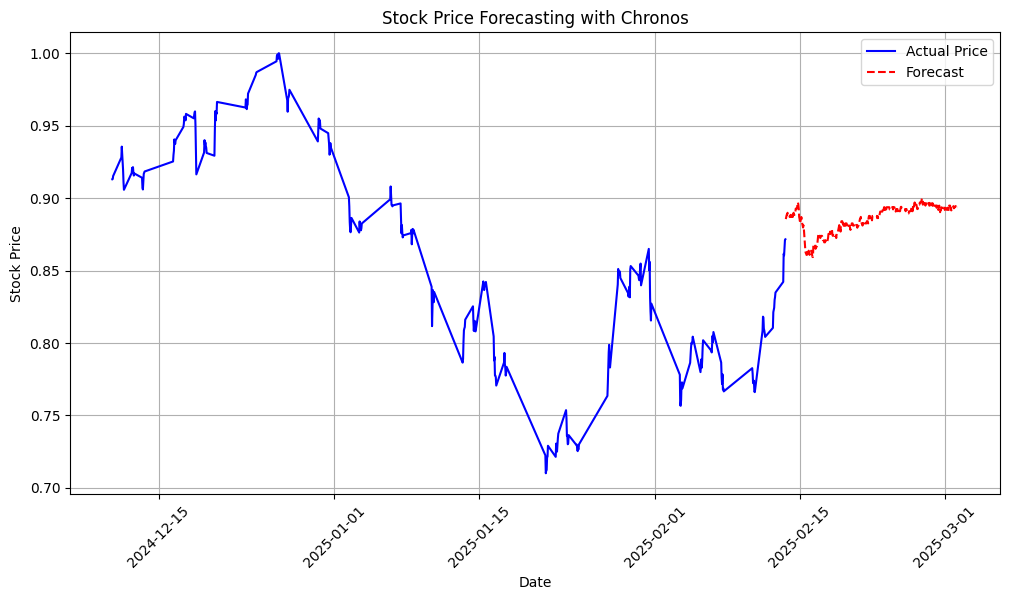

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df["Date"] = pd.to_datetime(df["Date"])
forecast_df["Date"] = pd.to_datetime(forecast_df["Date"])

# Plot actual stock price
plt.plot(df["Date"].iloc[-300:], df["Close"].iloc[-300:], label="Actual Price", color="blue")

# Plot forecasted price
plt.plot(forecast_df["Date"], forecast_df["Predicted_Close"], label="Forecast", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecasting with Chronos")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()